**Research question:**
----------------------

Lets say I'm at work, daydreaming of retirement. Given that I work at a hospital, I'm well aware that I'll probably spend more time in hospitals later on in life than I do now. So I'll probably want to live near the best hospitals. If hospital quality were the only deciding factor, which state should I plan to retire in?

**Methodology:**
----------------

Explore the data. Plot the data. Make decisions based on the data. Save up enough money to retire, and remember to check on these hospitals in about 30 years because the results might have changed by then. 

I'll comment out my code as much as possible, as reading others' comments has helped me tremendously. Lets begin by importing the data & loading all the libraries we'll use.

In [1]:
# Import data & load libraries-----------------------
Hosp <- read.csv("../input/HospInfo.csv", na.strings = c("Not Available", "Results are not available for this reporting period"))

library(tidyr) # for data manipulation
library(dplyr) # for data manipulation
library(ggplot2) # for data visualization


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Explore data-----------------------
dim(Hosp) #how many obs. & variables are there?

[1] 4807   29

In [3]:
# Smooth data into formats easier to work with 
Hosp$Hospital.overall.rating <- as.numeric(Hosp$Hospital.overall.rating)

# Subset of Hospitals that have ER services & an overall rating
Hosp2 <- subset(Hosp, Hospital.overall.rating >= 1
                & Emergency.Services == "true")

table(Hosp2$Hospital.overall.rating)


   1    2    3    4    5 
 106  668 1743  918   74 

In [4]:
# Find the mean star rating
Hosp2 %>% 
  summarise (mean = mean(Hospital.overall.rating))

mean
3.053007


Lets find the mean star rating, by state, then create a basic plot to quickly view the information.

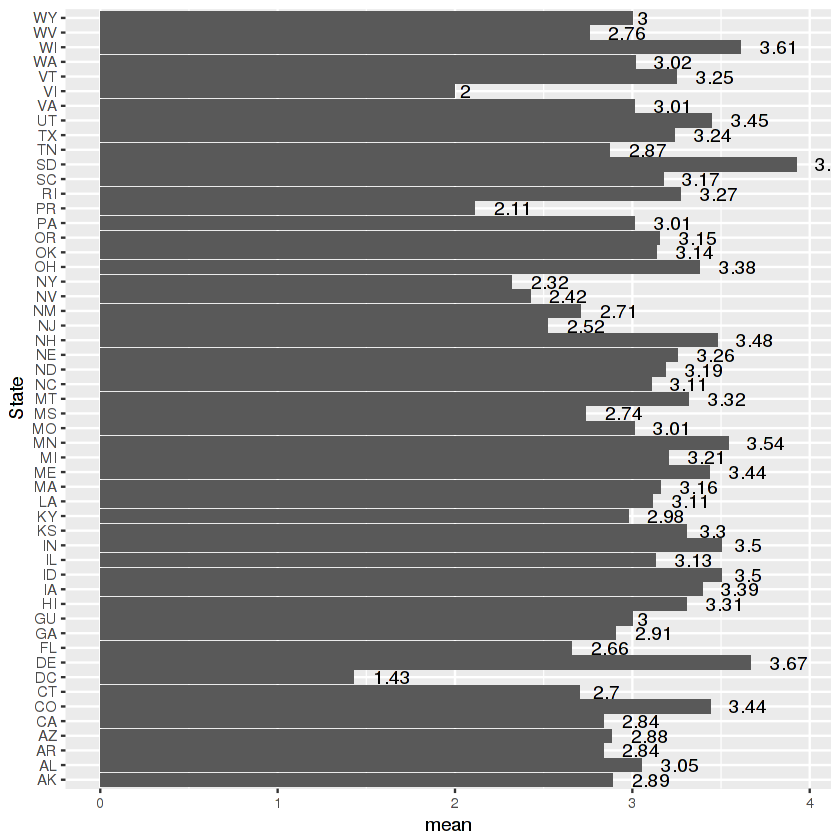

In [5]:
# Find the mean star rating, by state
ratebystate <- as.data.frame(Hosp2 %>% 
                               group_by(State) %>%
                               summarise (mean = mean(Hospital.overall.rating)))
# plot it
ggplot(data = ratebystate, 
       aes(x = State, y = mean)) + 
  geom_bar(stat = "identity") + 
  geom_text(aes(label = round(ratebystate$mean,2)), # label each bar with the mean, rounded to two digits
            hjust = -0.5) + #adjust the label to be a bit to the R of the bar, for easy visibility
  coord_flip() # flip the chart horizontally

Looks like South Dakota might be the winner! My apologies to those who live in DC. 

My next steps will be to make the data a little easier to view & understand. After all, it might take some convincing to get my spouse on-board with the move, so I'll need to make the case as clearly & attractively as possible. Lets see what we can do to make the information look nicer.

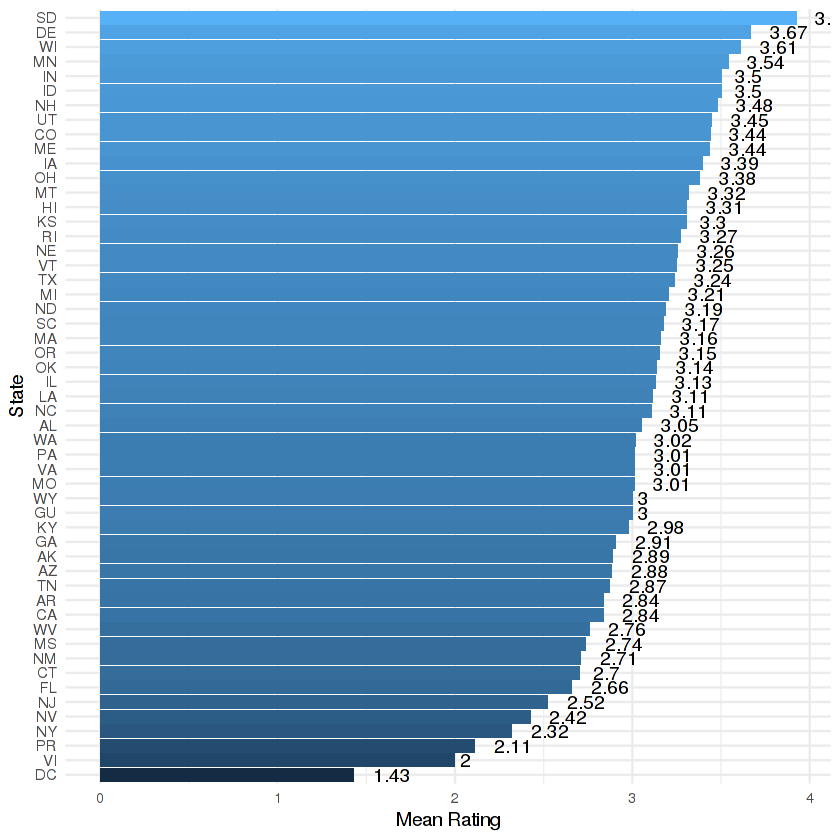

In [6]:
#plot it in descending order
ggplot(data = ratebystate, 
       aes(x = reorder(State, mean),
           y = mean)) + 
  geom_bar(stat = "identity", aes(fill = mean)) + 
  geom_text(aes(label = round(ratebystate$mean,2)), # label each bar with the mean, rounded to two digits
            hjust = -0.5) + #adjust the label to be a bit to the R of the bar, for easy visibility
  labs(x = "State", y = "Mean Rating") + # label axes
  coord_flip() + # flip the chart horizontally
  theme_minimal() +
  theme(legend.position = "none")

Yep, South Dakota is definitely the winner. Interestingly, three of the bottom five performers are a non-state metro area (DC) & 2 US territories--the Virgin Islands (VI) and Puerto Rico (PR). New York & Nevada round out the bunch. 

There's more that could be done here, but for my first kernel, I think this is a good start! Next perhaps I'll create a choropleth (color-coded map) to display the average hospital rating by state, and see which types of hospital ownership are conducive to the highest-quality hospitals. Feel free to make suggestions in the comments. Thanks!